In [1]:
### START ###

In [2]:
## Import necessary libraries ##
import pandas as pd
from sklearn import tree
import matplotlib.pyplot as plt

In [3]:
## Read training and testing dataset
trainingData = pd.read_csv('fraudTrain.csv')
testingData = pd.read_csv('fraudTest.csv')

In [4]:
## Info on training dataset ##
# Print size of dataset
print("Size of dataset", trainingData.size)

# Print number of frauds
print("Number of frauds: ", len(trainingData[trainingData["is_fraud"] == 1]))

# Display top of dataset
trainingData.head(2) 

Size of dataset 29823525
Number of frauds:  7506


,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0


In [5]:
## Clean training dataset ##

# Remove rows containing missing values
trainingData.drop_duplicates(inplace=True)
trainingData.dropna(inplace=True)

In [6]:
### ANALYSIS OF DATASET ###

In [7]:
## Info on cleaned dataset ##
# Get size of dataset
print("Size of dataset", trainingData.size)

# Get number of frauds
print("Number of frauds: ", len(trainingData[trainingData["is_fraud"] == 1]))

Size of dataset 29823525
Number of frauds:  7506


In [8]:
trainingData.dtypes

Unnamed: 0                 int64
trans_date_trans_time     object
cc_num                     int64
merchant                  object
category                  object
amt                      float64
first                     object
last                      object
gender                    object
street                    object
city                      object
state                     object
zip                        int64
lat                      float64
long                     float64
city_pop                   int64
job                       object
dob                       object
trans_num                 object
unix_time                  int64
merch_lat                float64
merch_long               float64
is_fraud                   int64
dtype: object

In [9]:
trainingData[trainingData["is_fraud"] == 1].head(5)

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
2449,2449,2019-01-02 01:06:37,4613314721966,fraud_Rutherford-Mertz,grocery_pos,281.06,Jason,Murphy,M,542 Steve Curve Suite 011,...,35.9946,-81.7266,885,Soil scientist,1988-09-15,e8a81877ae9a0a7f883e15cb39dc4022,1325466397,36.430124,-81.179483,1
2472,2472,2019-01-02 01:47:29,340187018810220,"fraud_Jenkins, Hauck and Friesen",gas_transport,11.52,Misty,Hart,F,27954 Hall Mill Suite 575,...,29.4400,-98.4590,1595797,Horticultural consultant,1960-10-28,bc7d41c41103877b03232f03f1f8d3f5,1325468849,29.819364,-99.142791,1
2523,2523,2019-01-02 03:05:23,340187018810220,fraud_Goodwin-Nitzsche,grocery_pos,276.31,Misty,Hart,F,27954 Hall Mill Suite 575,...,29.4400,-98.4590,1595797,Horticultural consultant,1960-10-28,b98f12f4168391b2203238813df5aa8c,1325473523,29.273085,-98.836360,1
2546,2546,2019-01-02 03:38:03,4613314721966,fraud_Erdman-Kertzmann,gas_transport,7.03,Jason,Murphy,M,542 Steve Curve Suite 011,...,35.9946,-81.7266,885,Soil scientist,1988-09-15,397894a5c4c02e3c61c784001f0f14e4,1325475483,35.909292,-82.091010,1
2553,2553,2019-01-02 03:55:47,340187018810220,fraud_Koepp-Parker,grocery_pos,275.73,Misty,Hart,F,27954 Hall Mill Suite 575,...,29.4400,-98.4590,1595797,Horticultural consultant,1960-10-28,7863235a750d73a244c07f1fb7f0185a,1325476547,29.786426,-98.683410,1


In [10]:
## Analysing frauds ##
#trainingData[trainingData["cc_num"] == 4593569795412]

trainingData.groupby("cc_num").filter(lambda group: (group["is_fraud"] == 1).any() and (group["is_fraud"] == 0).any()).head(2)

both_fraud_and_not_fraud = trainingData[trainingData["cc_num"] == 3534093764340240]

print(len(both_fraud_and_not_fraud[both_fraud_and_not_fraud["is_fraud"] == 0]))
print(len(both_fraud_and_not_fraud[both_fraud_and_not_fraud["is_fraud"] == 1]))

478
15


So in this dataset, the exact transaction when a credit card holder becomes a fraud is known.

In [11]:
def extractAndPrintSizeDistributionData(data):
    print("Mean:", data.mean())
    print("IQR:", data.quantile(0.25), "to", data.quantile(0.75))
    print("Range:", data.min(), "to", data.max())
    
    plt.figure(figsize=(10, 6))
    plt.hist(data, bins=10, color='blue')
    plt.xlabel("Number of transactions")
    plt.ylabel("Frequency")
    plt.title("Distribution of number of transactions per person")
    plt.show()

Mean: 1319.0996948118006
IQR: 525.0 to 2025.0
Range: 7 to 3123


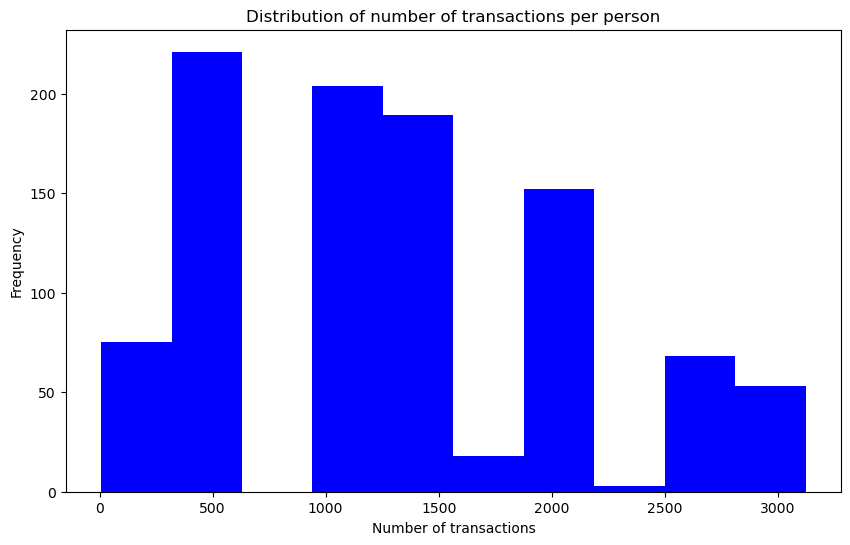

In [12]:
training_size_data = trainingData.groupby("cc_num").size()

# Info of the amount of transactions associated with every unique credit card account
extractAndPrintSizeDistributionData(training_size_data)

Mean: 9.850393700787402
IQR: 8.0 to 12.0
Range: 2 to 19


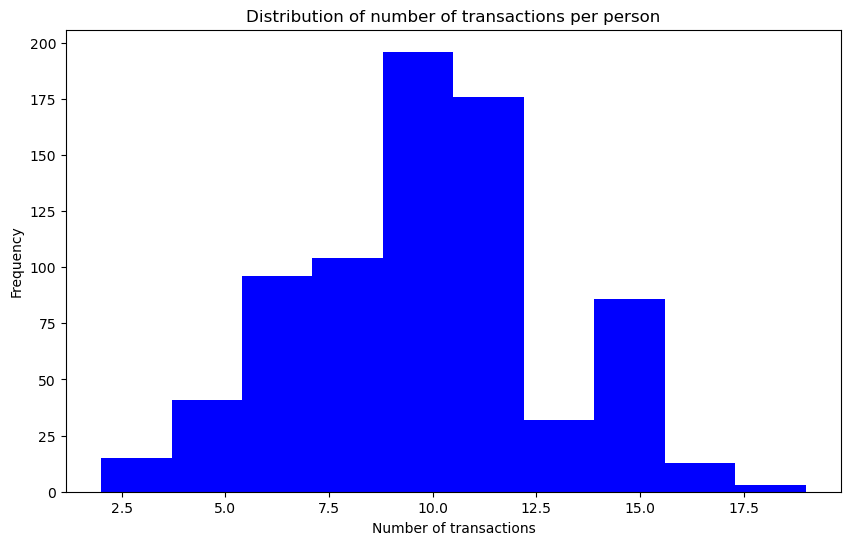

In [13]:
fraud_size_data = trainingData[trainingData["is_fraud"] == 1].groupby("cc_num").size()

# Info of the amount of transactions associated with every unique credit card that ended up being fraudulent
extractAndPrintSizeDistributionData(fraud_size_data)